# the dataset is taken from http://www.statmt.org/europarl/

In [87]:
import numpy as np
import pandas as pd
import os
import re
from nltk.tokenize import sent_tokenize
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
import time

In [12]:
max_req_len = 2000000

In [13]:
lang_index = { 
          1:'Danish', 2:'German', 3: 'English', 
          4: 'Spanish',5: 'Finnish', 
          6: 'French', 7: 'Italian', 
          8: 'Dutch', 9: 'Portuguese', 
          10: 'Swedish', 11: 'Bulgarian',
          12: 'Czech', 13: 'Estonian',
          14: 'Hungarian', 15: 'Lithuanian',
          16: 'Latvian', 17: 'Polish',
          18: 'Romanian', 19: 'Slovak',
          20: 'Slovenian'
          }

#blugarian, czech, estonian, lithianian, slovenian, polish, latvian, romanian, slovak

In [14]:
all_lang = {
    'Danish': ['da', '/Danish.txt'], 'German': ['de', '/German.txt'], 'English': ['en', '/English.txt'], 
    'Spanish': ['es', '/Spanish.txt'], 'Finnish': ['fi', '/Finnish.txt'],
    'French': ['fr','/French.txt'], 'Italian': ['it', '/Italian.txt'], 
    'Dutch': ['nl', '/Dutch.txt'], 'Portuguese': ['pt', '/Portuguese.txt'], 
    'Swedish': ['sv', '/Swedish.txt'], 'Bulgarian': ['bg', '/Bulgarian.txt'],
    'Czech': ['cs', '/Czech.txt'], 'Estonian': ['et', '/Estonian.txt'],
    'Hungarian': ['hu', '/Hungarian.txt'], 'Lithuanian': ['lt', '/Lithuanian.txt'],
    'Latvian': ['lv', '/Latvian.txt'], 'Polish': ['pl', '/Polish.txt'],
    'Romanian': ['ro', '/Romanian.txt'], 'Slovak': ['sk', '/Slovak.txt'],
    'Slovenian': ['sl', '/Slovenian.txt']
}

In [15]:
#sare path store kr lia
all_paths = []

for l in all_lang:
    all_paths.append(os.getcwd() + '/txt/' + all_lang[l][0] + all_lang[l][1])
all_paths

['/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/da/Danish.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/de/German.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/en/English.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/es/Spanish.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/fi/Finnish.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/fr/French.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/it/Italian.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/nl/Dutch.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/pt/Portuguese.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/sv/Swedish.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/bg/Bulgarian.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/cs/Czech.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/et/Estonian.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/hu/Hungarian.txt',
 '/Users/sanskrititomar/ML/LANGUAGE DETECTION/txt/lt/Lithuani

In [16]:
def combine_incomplete_files(code, lang):    
    
    lang_list = os.listdir('txt/' + code + '/')
    new_file = ''
    for file_name in lang_list:
        if(len(new_file) >= max_req_len):
            break;
        cwd = os.getcwd() + '/txt/' + code + '/' + file_name
        
        with open(cwd,'r') as f:
            content = f.read()
            new_file += content
    
    write_path = os.getcwd() + '/txt/' + code + '/' + lang + '.txt'
    with open(write_path, 'w') as f:
        f.write(new_file)

In [17]:

for l in all_lang.keys():
     combine_incomplete_files(all_lang[l][0], l)

In [18]:
def slice_files(cwd):
    with open(cwd) as f:
        new_file = f.read()
        new_file = new_file[:max_req_len]
    return new_file


#to shorten large data files to required size

trimmed_lang = []

for path in all_paths:
    trimmed_lang.append(slice_files(path))

print(trimmed_lang[11])

<CHAPTER ID="009-06">
6. Inovativní financování na globální a evropské úrovni (
<SPEAKER ID="141" NAME="Jean-Paul Gauzès" AFFILIATION="PPE">
(FR) Paní předsedající, lituji jistých nepřesností ve zprávě paní Podimataové, která nastoluje řadu důležitých otázek ohledně inovativního financování. Chtěl bych požádat skupinu Pokrokové aliance socialistů a demokratů v Evropském parlamentu, aby stáhla alternativní návrh, který předložila, aby bylo možné dokončit započatou společnou práci na návrhu.
<P>
Za druhé lituji mírně umělého nesouhlasu v otázce daně z finančních transakcí a toho, že zde jsou dva velmi podobné pozměňovací návrhy. Lituji, že v důsledku toho nemůže Parlament vyjádřit svou naprostou podporu této dani za podmínek přiměřených s ohledem na konkurenceschopnost Evropy.
<SPEAKER ID="142" NAME="Martin Schulz" AFFILIATION="S&amp;D">
(DE) Paní předsedající, panu Gauzèsovi mohu říci: ano, hodláme stáhnout tento návrh alternativního řešení. Doporučil jsem to své skupině z velmi prostéh

In [19]:
    
#make list of sentences

for i, l in enumerate(trimmed_lang):
        trimmed_lang[i] = sent_tokenize(l)
        
print(trimmed_lang[0])

['<CHAPTER ID="009-06">\n6.', 'Innovativ finansiering på globalt og europæisk plan (\n<SPEAKER ID="141" NAME="Jean-Paul Gauzès" AFFILIATION="PPE">\n(FR) Fru formand!', 'Jeg beklager, at der er en vis forvirring i denne betænkning af fru Podimata, som rejser en række vigtige aspekter af innovativ finansiering.', 'Jeg vil gerne bede Gruppen for Det Progressive Forbund af Socialdemokrater i Parlamentet om at trække deres alternative forslag tilbage, så vi kan afslutte det fælles arbejde med udkastet.', '<P>\nFor det andet beklager jeg, at der er skabt en lidt kunstig modsætning vedrørende spørgsmålet om en skat på finansielle transaktioner, og at der er to meget enslydende ændringsforslag.', 'Jeg beklager, at Parlamentet af den grund ikke kan udtrykke overvældende støtte til denne skat under forhold, der er rimelige med hensyn til Europas konkurrenceevne.', '<SPEAKER ID="142" NAME="Martin Schulz" AFFILIATION="S&amp;D">\n(DE) Fru formand!', 'Jeg kan sige følgende til hr.', 'Gauzès: Ja, vi 

In [20]:
def rem_space(sentences):
    while("" in sentences) : 
        sentences.remove("") 

def remove_unwanted_characters(sentences):
    for i, s in enumerate(sentences):
        sentences[i] = re.sub('[^a-zA-Z]+',' ',s)
        
        #sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentences[i] = re.sub('[^a-zA-Z]', ' ', sentences[i])

        # Single character removal
        sentences[i] = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentences[i])

        # Removing multiple spaces
        sentences[i] = re.sub(r'\s+', ' ', sentences[i])
        sentences[i] = re.sub('<[^>]+>', '', s)
# #         print(sentences[i])
        sentences[i] = re.sub('[^a-zA-Z]+',' ',s)
        if('SPEAKER' in sentences[i]):
            sentences[i] = ""
        if('CHAPTER ID' in sentences[i]):
            sentences[i]=""
 


        
#clean text using REGEX
for s in trimmed_lang:
        remove_unwanted_characters(s)
        
for s in trimmed_lang:
        rem_space(s)
        

trimmed_lang[2]


# def remove_unwanted_characters(sentences):
#     for i, s in enumerate(sentences):
#         sentences[i] = re.sub('[^a-zA-Z]+',' ',s)
        
# #clean text using REGEX
# for s in trimmed_lang:
#         remove_unwanted_characters(s)

['I would like to ask the Group of the Progressive Alliance of Socialists and Democrats in the European Parliament to withdraw the alternative motion it has tabled so that the joint drafting work that has been carried out can be concluded ',
 ' P Secondly I regret that a slightly artificial opposition has emerged on the issue of a tax on financial transactions and that there are two very similar amendments ',
 'I regret that as a result Parliament cannot express its overwhelming support for this tax in conditions that are reasonable with regard to Europe s competitiveness ',
 'I recommended this to my group for a very simple reason The following amendment which has been signed by Members from all groups shows that proposals regarding a financial transaction tax are not the preserve of any one group whether the socialists conservatives the Group of the European People s Party Christian Democrats or the Group of the Greens European Free Alliance ',
 'The point is that we are making an in

In [21]:
def combine_lang(sentences,label):
    sentences = np.array(sentences)
    sentences = sentences.reshape(sentences.shape[0],1)
    target = np.zeros((sentences.shape[0],1))
    target += label
    language_data = np.hstack((sentences, target))
    return language_data

languages_with_index = []

for i,s in enumerate(trimmed_lang):
    languages_with_index.append(combine_lang(s,i+1)) 

languages_with_index = np.vstack((languages_with_index))
languages_with_index = np.array(languages_with_index)

In [22]:
#shuffling all the sentences
i = np.arange(0, len(languages_with_index))
np.random.shuffle(i)
languages_with_index = languages_with_index[i,:]


In [23]:
# creating data frame with all the sentences
df = pd.DataFrame(languages_with_index)
df.columns = ['sentences', 'label']
df['label'] = df['label'].apply(float)
df['language'] = df['label'].map(lang_index)

df

sentences  label    language
0       La credibilit dell UE in questo ambito non dov...    7.0     Italian
1                                      Esta ainda existe     9.0  Portuguese
2        P Lyon r Sk ci ra vonatkoz k rd s re v laszol...   14.0   Hungarian
3       Ten years ago when the Maastricht Treaty was n...    3.0     English
4       Ali lahko Komisija razlo i kateri ukrepi do zd...   20.0   Slovenian
...                                                   ...    ...         ...
247982                                                 P    11.0   Bulgarian
247983  Jen populace EU ve v ku od do let pou v intern...   12.0       Czech
247984  V listada ei saa siiski tulevikus individuaals...   13.0    Estonian
247985  Este es un ejemplo m s de los m todos medieval...    4.0     Spanish
247986  Imamo novo skupno skrb in sicer feminizacijo r...   20.0   Slovenian

[247987 rows x 3 columns]

In [24]:
print(df.shape)
print(df['language'].value_counts())
freq_list = df['language'].value_counts()

(247987, 3)
Danish        14778
Czech         13790
Swedish       13775
Estonian      13399
Lithuanian    13300
Latvian       12910
Finnish       12824
Slovenian     12802
Slovak        12787
Polish        12392
Dutch         12367
English       12314
German        12202
Hungarian     11879
Spanish       11370
Portuguese    11335
French        11242
Bulgarian     10976
Italian       10835
Romanian      10710
Name: language, dtype: int64


In [25]:
language_list = [ 'Estonian','Lithuanian','Czech','Latvian','Slovenian','Slovak','Polish','Hungarian','Bulgarian','Romanian','Danish','Dutch','Swedish','German','Spanish','Finnish','English','French','Portuguese','Italian'  ]

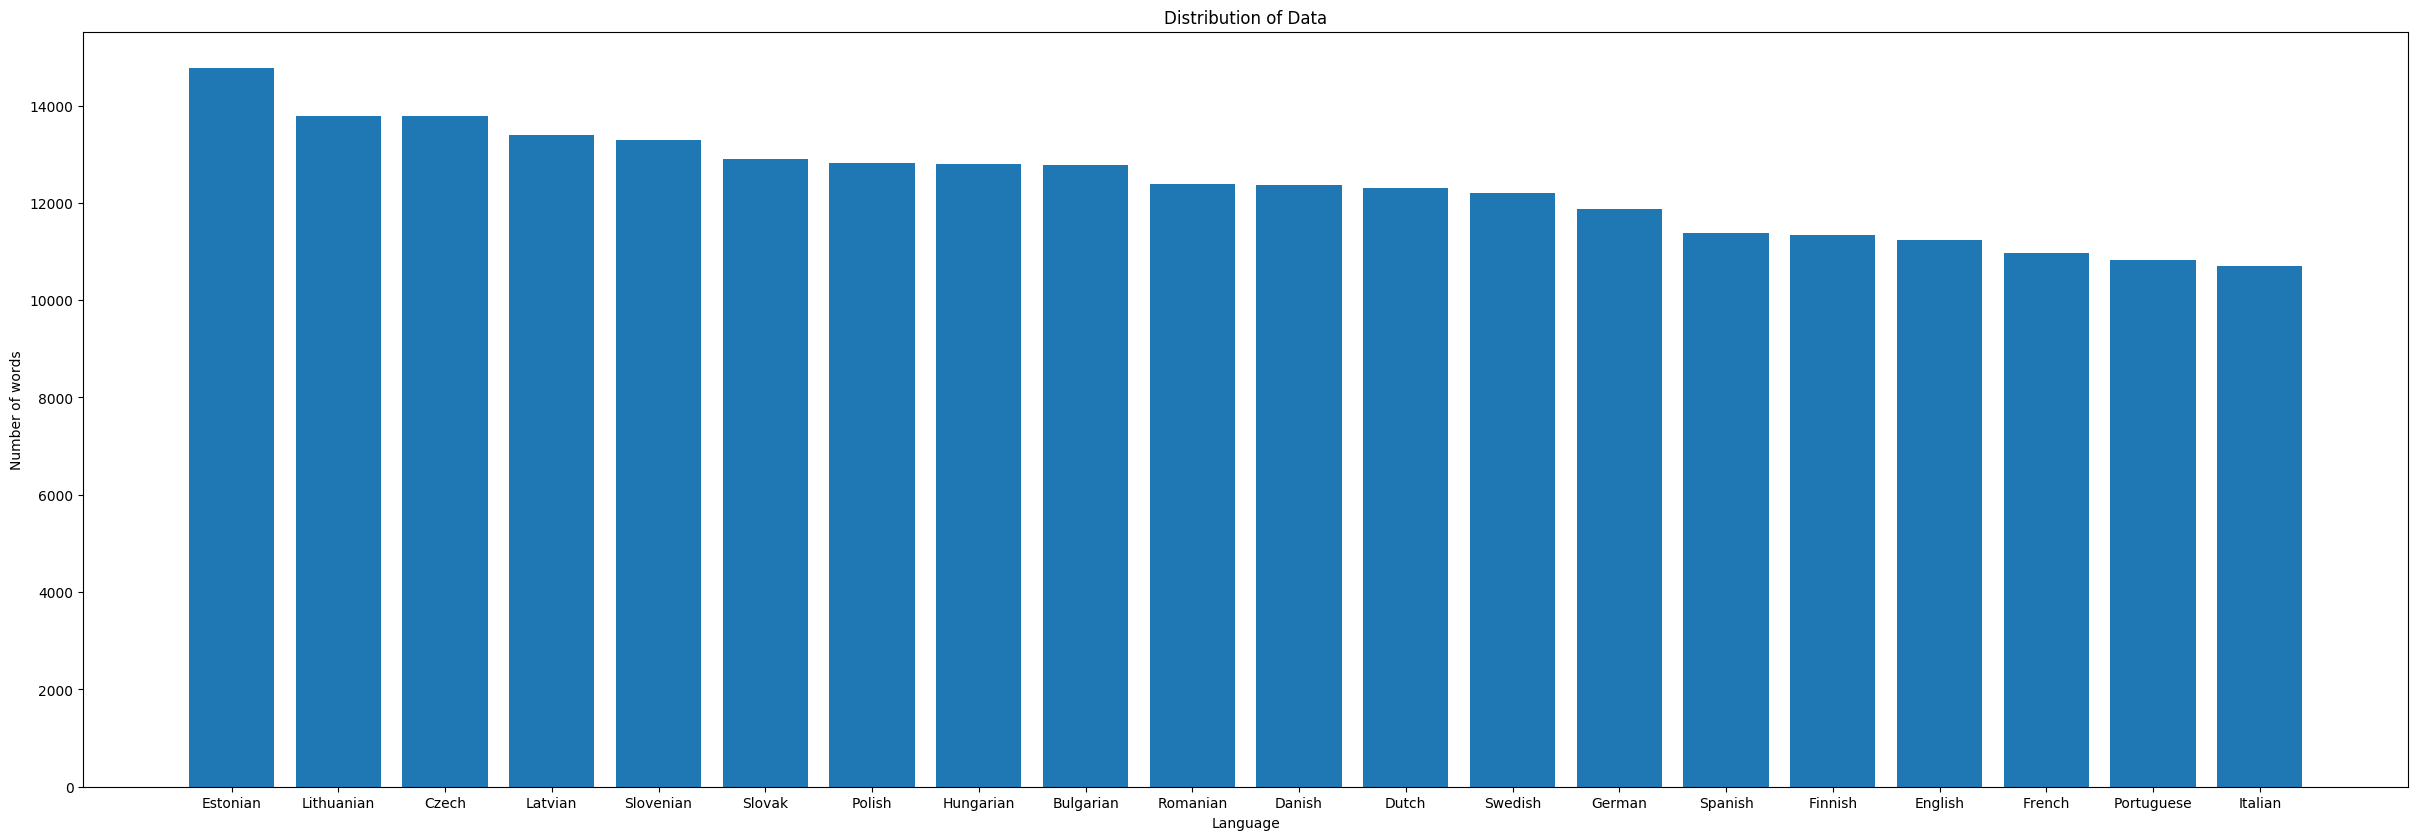

In [56]:
import matplotlib.pyplot as plt
# Data distribution
fig=plt.figure(figsize=(30, 10), dpi= 100, facecolor='white', edgecolor='red')
plt.bar(language_list,freq_list)
plt.xticks(rotation=0)
plt.title('Distribution of Data')
plt.xlabel('Language')
plt.ylabel('Number of words')
plt.show()

In [27]:
languages_with_index[:,0]

array(['La credibilit dell UE in questo ambito non dovrebbe essere data per scontata e anche le nostre politiche rischiano di essere valutate con due pesi e due misure ',
       'Esta ainda existe ',
       ' P Lyon r Sk ci ra vonatkoz k rd s re v laszolva a Bizotts g itt is csak betartja a rendeleteket amelyek el rj k hogy azoknak a mez gazdas gi termel knek az eset ben amelyek nem felelnek meg a k lcs n s megfeleltet sre vonatkoz el r soknak szankci kat kell alkalmazni s ez gy van nemcsak Sk ci ban hanem szak rorsz gban s Eur pa m s r szein is ',
       ...,
       'V listada ei saa siiski tulevikus individuaalsete sanktsioonide eriti haldussanktsioonide kasutuselev ttu ',
       'Este es un ejemplo m s de los m todos medievales aplicados por Ir n ',
       'Imamo novo skupno skrb in sicer feminizacijo rev ine '],
      dtype='<U1430')

In [28]:
languages_with_index[:,1]

array(['7.0', '9.0', '14.0', ..., '13.0', '4.0', '20.0'], dtype='<U1430')

### Splitting data into test and training data 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(languages_with_index[:,0], 
                                                    languages_with_index[:,1],
                                                    test_size = 0.25,
                                                    random_state = 0)

# X_train, X_test, y_train, y_test = train_test_split(df['sentences'], 
#                                                     df['label'],
#                                                     test_size = 0.25,
#                                                     random_state = 0)

In [30]:
print(X_train)
print(y_train)

['Antra Europos Komisijos nariu gali b ti tik profesionalus optimistas bent jau jei jums pavedama ES pl tra ir santykiai su Pietry i Europa '
 ' P Caros colegas tal como j referi anteriormente a situa o com que somos confrontados extremamente sui generis e absolutamente nica estamos perante o nico Tratado que acompanhado de um prazo de vencimento e cuja sucess o jur dica depende em grande medida de um Tratado que n o s ainda n o foi ratificado mas que provavelmente n o poder ser ratificado a tempo '
 'Elevate projekts upuriem pied v dro u patv rumu un atbalstu atjaunojot to p rliec bu un sp ju iek auties sabiedr b '
 ...
 'Preto v s iadam zabezpe i aby sme na nadch dzaj cej reforme mohli pracova spolo ne a aby mala tak trukt ru ktor umo n jej vykon vanie s o najmen m administrat vnym za a en m a o najmen m za a en m v oblasti doh adu '
 ' P '
 ' P T m n kaiken huomioon ottaen on selv etteiv t neuvosto ja komissio voi est kansalaisten joko siviilien tai armeijan henkil st n l hett mist 

### Logistic regression

In [31]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range = (1,3),analyzer = 'char')
trained_model = pipeline.Pipeline([('vectorizer',vectorizer),('clf', linear_model.LogisticRegression())])

In [32]:
import time
s=time.time()
trained_model.fit(X_train,y_train)
e=time.time()
time_taken_LR = e-s
print(time_taken_LR,'Seconds')

412.08663725852966 Seconds


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
tlr = time_taken_LR

In [33]:
y_pred = trained_model.predict(X_test)

In [34]:
y_pred

array(['6.0', '9.0', '5.0', ..., '6.0', '8.0', '19.0'], dtype='<U1430')

In [35]:
print("Accuracy : ", (accuracy_score(y_test,y_pred))*100, "%")

Accuracy :  99.35319450941175 %


### Testing model

In [36]:
import pickle
lrFile = open('LRModel.pckl','wb')
pickle.dump(trained_model,lrFile)
lrFile.close()

In [53]:
global lrLangDetectModel

lrLangDetectFile = open('LRModel.pckl','rb')
lrLangDetectModel = pickle.load(lrLangDetectFile)
lrLangDetectFile.close()

def lang_detect(text):
    import numpy as np
    import string
    import re
    import pickle
    translate_table = dict((ord(char),None) for char in string.punctuation)
    
    global lrLangDetectModel
    lrLangDetectFile = open('LRModel.pckl','rb')
    lrLangDetectModel = pickle.load(lrLangDetectFile)
    lrLangDetectFile.close()
    
    text = " ".join(text.split())
    text = text.lower()
    text = re.sub(r"\d+","",text)
    text = text.translate(translate_table)
    pred = lrLangDetectModel.predict([text])
    prob = lrLangDetectModel.predict_proba([text])
    return pred[0]

def 

In [55]:
lang_detect("How are you feeling")

numpy.str_

In [39]:
#english
lang_detect("I'm happy for you")

'3.0'

In [40]:
#french
lang_detect("Je suis allé au revoir")

'6.0'

In [71]:
#Dutch
lang_detect("Ik ben vandaag naar de markt geweest")

'8.0'

In [72]:
lang_detect("this project uses machine learning")

'3.0'

In [81]:
lang_detect("Ahoj ako sa máš")

'19.0'

### Classification report & Confusion matrix for logistic regression model

In [80]:
print(classification_report(y_test, y_pred, target_names=lang_index.values()))

              precision    recall  f1-score   support

      Danish       0.99      0.99      0.99      3675
      German       0.99      0.99      0.99      3463
     English       0.96      0.99      0.97      2709
     Spanish       0.99      0.99      0.99      3325
     Finnish       1.00      1.00      1.00      3305
      French       1.00      0.99      1.00      2939
     Italian       0.99      0.99      0.99      3321
       Dutch       1.00      1.00      1.00      3285
  Portuguese       1.00      1.00      1.00      3066
     Swedish       1.00      1.00      1.00      2714
   Bulgarian       0.99      0.98      0.99      3114
       Czech       1.00      0.99      0.99      3095
    Estonian       0.99      0.99      0.99      3156
   Hungarian       1.00      1.00      1.00      3082
  Lithuanian       0.99      0.99      0.99      2843
     Latvian       1.00      1.00      1.00      3247
      Polish       1.00      1.00      1.00      2877
    Romanian       1.00    

In [119]:
lrlis = []
lrlis.append("Logistic Regression")
lrlis.append(tlr)
lrlis.append(accuracy_score(y_test,y_pred))
lrlis.append(pslr)
lrlis.append(rslr)
lrlis.append(f1_score(y_test, y_pred,average='weighted' ))

In [89]:
pslr = precision_score(y_test, y_pred,average='weighted' )

TP/ (TP+FP)

In [91]:
rslr = recall_score(y_test,y_pred,average='weighted')

TP/(TP + FN)

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9'),
 Text(0, 9.5, '10'),
 Text(0, 10.5, '11'),
 Text(0, 11.5, '12'),
 Text(0, 12.5, '13'),
 Text(0, 13.5, '14'),
 Text(0, 14.5, '15'),
 Text(0, 15.5, '16'),
 Text(0, 16.5, '17'),
 Text(0, 17.5, '18'),
 Text(0, 18.5, '19'),
 Text(0, 19.5, '20')]

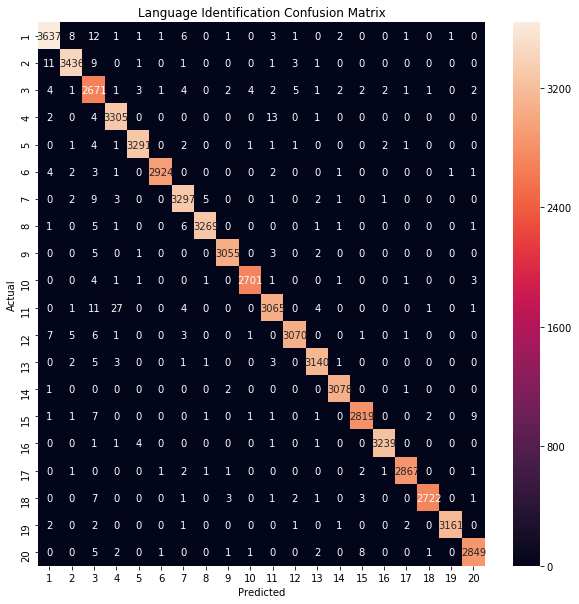

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

languages = list(all_lang.keys())
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)

fig = sns.heatmap(cm, annot = True, fmt = "n")

fig.set_xlabel('Predicted')
fig.set_ylabel('Actual')
fig.set_title('Language Identification Confusion Matrix')
fig.set_xticklabels(lang_index.keys())
fig.set_yticklabels(lang_index.keys())

### Multinomial Naive Bayes

In [58]:

vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range = (1,3),analyzer = 'char')
trained_m = pipeline.Pipeline([('vectorizer',vectorizer),('clf', MultinomialNB())])

In [59]:
s1=time.time()
trained_m.fit(X_train,y_train)
e1=time.time()
time_taken_NB = e1-s1
print(time_taken_LR,'Seconds')

412.08663725852966 Seconds


In [76]:
tnb = time_taken_NB

In [60]:
y_pred1=trained_m.predict(X_test)

In [140]:
accuracy_score(y_test,y_pred1)

0.9904188912366727

In [120]:
nblis = []
nblis.append("Naive Bayes")
nblis.append(tnb)
nblis.append(anb)
nblis.append(precision_score(y_test, y_pred1,average='weighted' ))
nblis.append(recall_score(y_test,y_pred1,average='weighted'))
nblis.append(f1_score(y_test,y_pred1,average='weighted'))

### Classification report & Confusion matrix for Naive Bayes model

In [79]:
print(classification_report(y_test, y_pred1, target_names=lang_index.values()))

              precision    recall  f1-score   support

      Danish       0.38      0.98      0.55      3917
      German       0.99      0.92      0.95      3708
     English       0.97      0.83      0.89      3187
     Spanish       0.98      0.90      0.93      3804
     Finnish       0.99      0.90      0.94      3748
      French       0.99      0.88      0.94      3266
     Italian       0.99      0.87      0.93      3661
       Dutch       0.99      0.89      0.94      3608
  Portuguese       0.99      0.88      0.94      3531
     Swedish       0.99      0.88      0.93      3065
   Bulgarian       0.99      0.87      0.93      3574
       Czech       0.99      0.91      0.95      3354
    Estonian       0.99      0.88      0.93      3590
   Hungarian       0.99      0.91      0.95      3431
  Lithuanian       0.99      0.91      0.95      3170
     Latvian       1.00      0.91      0.95      3496
      Polish       0.99      0.92      0.95      3135
    Romanian       0.99    

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9'),
 Text(0, 9.5, '10'),
 Text(0, 10.5, '11'),
 Text(0, 11.5, '12'),
 Text(0, 12.5, '13'),
 Text(0, 13.5, '14'),
 Text(0, 14.5, '15'),
 Text(0, 15.5, '16'),
 Text(0, 16.5, '17'),
 Text(0, 17.5, '18'),
 Text(0, 18.5, '19'),
 Text(0, 19.5, '20')]

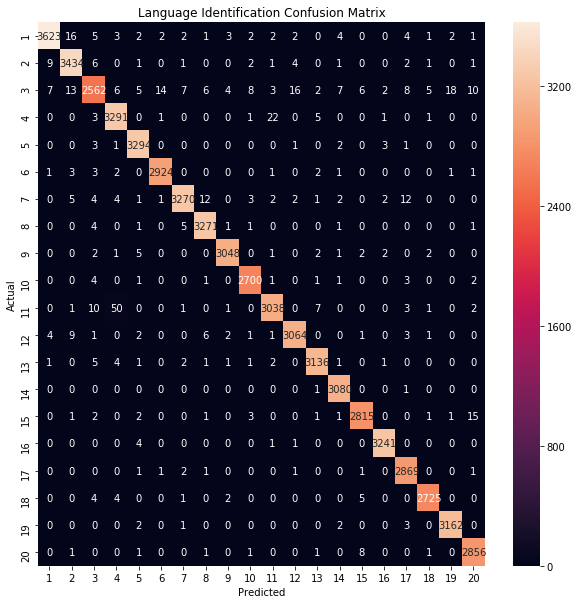

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

languages = list(all_lang.keys())
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred1)

fig = sns.heatmap(cm, annot = True, fmt = "n")

fig.set_xlabel('Predicted')
fig.set_ylabel('Actual')
fig.set_title('Language Identification Confusion Matrix')
fig.set_xticklabels(lang_index.keys())
fig.set_yticklabels(lang_index.keys())

### SVM

In [65]:
from sklearn.svm import LinearSVC
start=time.time()
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range = (1,3),analyzer = 'char')
algo = pipeline.Pipeline([('vectorizer',vectorizer),('clf', MultinomialNB())])
algo.fit(X_train,y_train)
y_train_predict=algo.predict(X_train)
y_test_predict=algo.predict(X_test)
end=time.time()

In [77]:
tsvm = end - start

In [67]:
accuracy_score(y_test,y_test_predict)

0.9904188912366727

In [131]:
svlis = []
svlis.append("SVM")
svlis.append(tsvm)
svlis.append(accuracy_score(y_test,y_test_predict))
svlis.append(precision_score(y_test, y_test_predict,average='weighted' ))
svlis.append(recall_score(y_test,y_test_predict,average='weighted'))
svlis.append(f1_score(y_test,y_test_predict,average='weighted'))

### Classification report & Confusion matrix for SVM

In [74]:
print(classification_report(y_test, y_test_predict, target_names=lang_index.values()))

              precision    recall  f1-score   support

      Danish       0.99      0.99      0.99      3675
      German       0.99      0.99      0.99      3463
     English       0.98      0.95      0.96      2709
     Spanish       0.98      0.99      0.98      3325
     Finnish       0.99      1.00      0.99      3305
      French       0.99      0.99      0.99      2939
     Italian       0.99      0.98      0.99      3321
       Dutch       0.99      1.00      0.99      3285
  Portuguese       1.00      0.99      0.99      3066
     Swedish       0.99      0.99      0.99      2714
   Bulgarian       0.99      0.98      0.98      3114
       Czech       0.99      0.99      0.99      3095
    Estonian       0.99      0.99      0.99      3156
   Hungarian       0.99      1.00      1.00      3082
  Lithuanian       0.99      0.99      0.99      2843
     Latvian       1.00      1.00      1.00      3247
      Polish       0.99      1.00      0.99      2877
    Romanian       0.99    

[Text(0, 0.5, '1'),
 Text(0, 1.5, '2'),
 Text(0, 2.5, '3'),
 Text(0, 3.5, '4'),
 Text(0, 4.5, '5'),
 Text(0, 5.5, '6'),
 Text(0, 6.5, '7'),
 Text(0, 7.5, '8'),
 Text(0, 8.5, '9'),
 Text(0, 9.5, '10'),
 Text(0, 10.5, '11'),
 Text(0, 11.5, '12'),
 Text(0, 12.5, '13'),
 Text(0, 13.5, '14'),
 Text(0, 14.5, '15'),
 Text(0, 15.5, '16'),
 Text(0, 16.5, '17'),
 Text(0, 17.5, '18'),
 Text(0, 18.5, '19'),
 Text(0, 19.5, '20')]

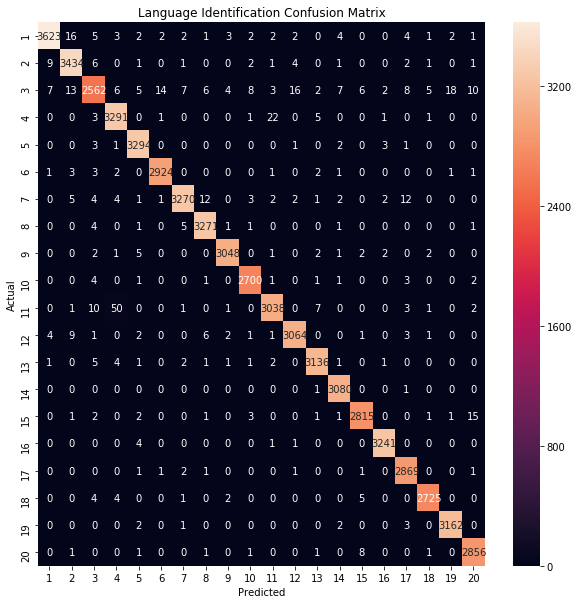

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

languages = list(all_lang.keys())
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_test_predict)

fig = sns.heatmap(cm, annot = True, fmt = "n")

fig.set_xlabel('Predicted')
fig.set_ylabel('Actual')
fig.set_title('Language Identification Confusion Matrix')
fig.set_xticklabels(lang_index.keys())
fig.set_yticklabels(lang_index.keys())

### ------------------------------------------------

In [68]:
mystring = "at"
mybytes = mystring.encode('utf-8')
myint = int.from_bytes(mybytes, 'little')
print(myint)
recoveredbytes = myint.to_bytes((myint.bit_length() + 7) // 8, 'little')
recoveredstring = recoveredbytes.decode('utf-8')
print(recoveredstring)

29793
at


In [147]:
resdf

Algorithm  Time (in seconds)  Acurracy  Precision    Recall  \
0  Logistic Regression         412.086637  0.993532   0.993566  0.993532   
1          Naive Bayes         118.180841  0.990419   0.990414  0.990419   
2                  SVM         217.264898  0.990419   0.990414  0.990419   
3                  KNN         612.400054  0.998351   0.992414  0.990432   

   F1 Score  
0  0.993542  
1  0.990394  
2  0.990394  
3  0.984524